In [1]:
import pandas as pd
import numpy as np
import warnings
import calendar
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ted_main.csv')
df.head(4)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550


In [3]:
df.isnull().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [5]:
df['film_date'] = pd.to_datetime(df['film_date'], unit = 's')
df['published_date'] = pd.to_datetime(df['published_date'], unit = 's')
df.head(2)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520


## Analysing talks by Month and Year and Day
Ted Talks tend to occur all throughout the year. 

**Is there some popular month as far as TED is concerned?** In other words, **how are the talks distributed throughout the months since its inception?**

Here we will find out answers to these questions and find ou the popular months and day of the week when ted conferences occur the most. Also we will see here the years when ted talks have occurred the most since the time they have begun.

### 1. Analysis by Month
We will analyze which months are most popular for the ted conferences by using film date data.
We have extraced month from the date and desgined a function to keep the counter of each month and map it against its key in dictionary.

In [6]:

vidoesPerMonth = {}

def videosPerMonthCounter(x) :
  m = calendar.month_name[x.month][0:3]
  val = vidoesPerMonth.get(m, 0)
  val += 1
  vidoesPerMonth[m] = val

df['film_date'].apply(
  videosPerMonthCounter
)

print (vidoesPerMonth)

{'Feb': 601, 'Jul': 253, 'Nov': 232, 'Mar': 397, 'Dec': 123, 'Jun': 270, 'Sep': 107, 'Jan': 33, 'Oct': 208, 'May': 123, 'Apr': 173, 'Aug': 30}


After taking the count of talks in each month, we have tried visualizing the same though bar plot

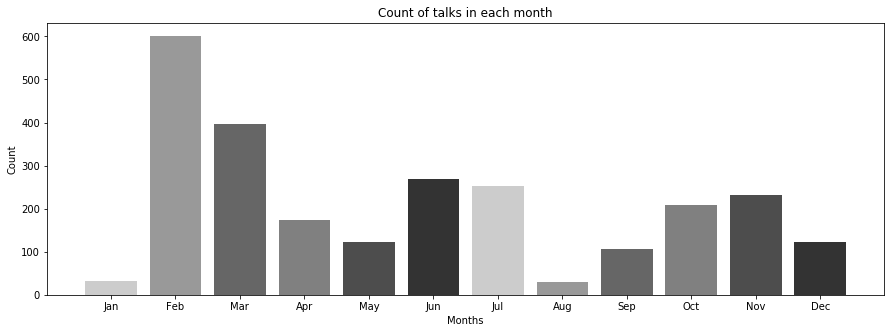

In [7]:
#vidoesPerMonth
#D = {u'Label1':26, u'Label2': 17, u'Label3':30}
valList = [0,0,0,0,0,0,0,0,0,0,0,0]
keyList = ['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for k in sorted(vidoesPerMonth.keys()):
    valList[keyList.index(k)] = vidoesPerMonth[k]

fig= plt.figure(figsize=(15,5))
plt.bar(range(len(vidoesPerMonth)), valList, align='center',color=['0.8','0.6','0.4','0.5','0.3','0.2'])
plt.xticks(range(len(vidoesPerMonth)), keyList)
plt.title('Count of talks in each month')
plt.xlabel('Months')
plt.ylabel('Count')
# # for python 2.x:
# plt.bar(range(len(D)), D.values(), align='center')  # python 2.x
# plt.xticks(range(len(D)), D.keys())  # in python 2.x

plt.show()

**February** is clearly the **most popular month** for TED Conferences whereas **August and January are the least popular**. February's popularity is largely due to the fact that the official TED Conferences are held in February

### 2. Analysis by Year
We will analyze which years have the maximum number of talks from our dataset.
We have extraced year from the date and desgined a function to keep the counter of each year and map it against its key in dictionary.

In [8]:
vidoesPerYear = {}

def videosPerYearCounter(x) :
  y = x.year
  val = vidoesPerYear.get(y, 0)
  val += 1
  vidoesPerYear[y] = val

df['film_date'].apply(
  videosPerYearCounter
)

print (vidoesPerYear)

{2006: 50, 2004: 33, 2005: 66, 2003: 33, 2007: 114, 2002: 27, 2001: 5, 2008: 84, 1984: 1, 1990: 1, 1998: 6, 2009: 232, 1991: 1, 2010: 267, 1983: 1, 1972: 1, 2011: 270, 2012: 267, 1994: 1, 2013: 270, 2014: 237, 2015: 239, 2016: 246, 2017: 98}


After taking the count of talks in each year, we have tried visualizing the same though point plot.
Hear we have use seaborn library which is referenced using sb

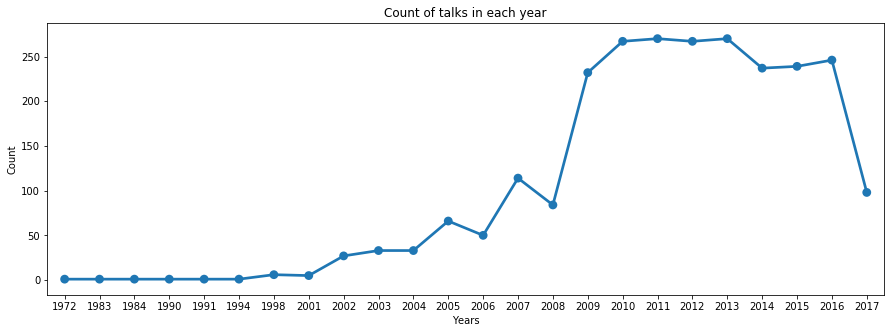

In [9]:
vl = []
kl = []
for k in sorted(vidoesPerYear.keys()):
    vl.append(vidoesPerYear[k])
    kl.append(k)

fig= plt.figure(figsize=(15,5))
sb.pointplot(kl,vl)
plt.title('Count of talks in each year')
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

Some analysis made from above plot is:

•	As expected, the number of TED Talks have gradually increased over the years since its inception in 1972.

•	There was a sharp increase in the number if talks in 2009.

•	The number of talks have been pretty much constant since 2009.

**Now we are checking which are the talks that generated the least number of views and try to investigate on why that happened.**
For the purpose of the analysis I will use the term "unpopular" for the talks that have generated least amount views.

In [10]:
unpopular_talks = df[['title', 'main_speaker', 'published_date', 'views', 'comments', 'ratings']].sort_values('views')[:15].reset_index(drop=True)
unpopular_talks

,title,main_speaker,published_date,views,comments,ratings
0,Stories of Haiti,Edwidge Danticat,2010-01-14 15:04:00,50443,20,"[{'id': 1, 'name': 'Beautiful', 'count': 25}, ..."
1,The debut of the British Paraorchestra,Charles Hazlewood + British Paraorchestra,2012-01-15 15:24:49,66668,43,"[{'id': 10, 'name': 'Inspiring', 'count': 105}..."
2,"""Kounandi""",Rokia Traore,2008-06-05 01:00:00,82488,43,"[{'id': 22, 'name': 'Fascinating', 'count': 84..."
3,The early birdwatchers,Tim Birkhead,2010-09-26 08:00:00,112321,40,"[{'id': 22, 'name': 'Fascinating', 'count': 14..."
4,Let's bridge the digital divide!,Aleph Molinari,2012-02-04 15:01:38,115346,80,"[{'id': 26, 'name': 'Obnoxious', 'count': 9}, ..."
5,Beethoven the businessman,José Bowen,2012-05-12 13:58:07,117756,73,"[{'id': 24, 'name': 'Persuasive', 'count': 50}..."
6,Deaf in the military,Keith Nolan,2012-02-12 14:56:39,120274,70,"[{'id': 22, 'name': 'Fascinating', 'count': 61..."
7,Don't misrepresent Africa,Leslie Dodson,2011-12-03 15:01:06,121186,84,"[{'id': 11, 'name': 'Longwinded', 'count': 45}..."
8,"Change our culture, change our world",Nate Garvis,2012-01-07 16:08:00,125050,70,"[{'id': 8, 'name': 'Informative', 'count': 63}..."
9,Beautiful artificial limbs,Scott Summit,2012-03-17 13:56:49,132199,84,"[{'id': 10, 'name': 'Inspiring', 'count': 191}..."


Visulalizing the unpopular talks by views.

Text(0, 0.5, 'Title')

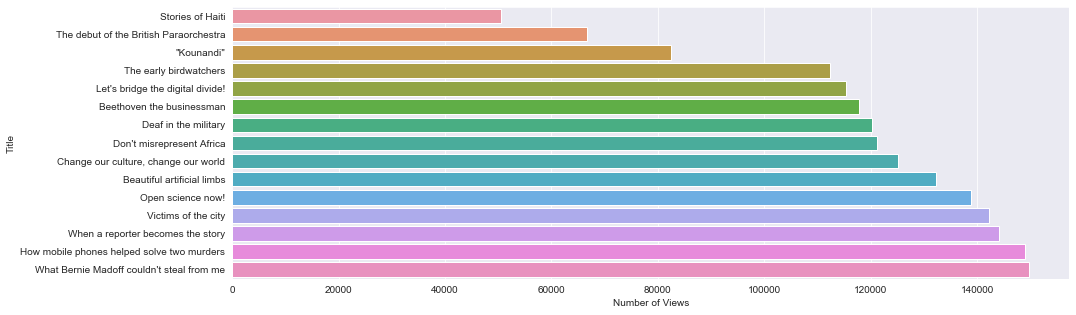

In [11]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(x='views', y=unpopular_talks.title, data=unpopular_talks)
plt.xlabel("Number of Views")
plt.ylabel("Title")

**Stories of Haiti** has the least number of views with only 20 comments. From the top 15 of least viewed talks it can be seen that the published date been too recent is not the cause of low view count due to the fact that the TED talks data spans to 21st of September 2017. From the 4th talk onward in our unpoplar dataset the number of views increase by very little as it can be observed from the plot (no big spikes in views).

Now I am going to remove the talks associated with TEDx and perform the unpopularity analysis on the rest of the data to see if any of the other features can be related to the popularity of a talk.

In [12]:
df_no_tedex = df[~df['event'].str.contains('TEDx')].sort_values('views')[:15].reset_index(drop=True)
unpopular_data_no_tedex = df_no_tedex[['title','event', 'main_speaker', 'published_date', 'views', 'tags', 'comments', 'ratings']]
unpopular_data_no_tedex

,title,event,main_speaker,published_date,views,tags,comments,ratings
0,Stories of Haiti,University of California,Edwidge Danticat,2010-01-14 15:04:00,50443,"['books', 'disaster relief', 'novel', 'poetry'...",20,"[{'id': 1, 'name': 'Beautiful', 'count': 25}, ..."
1,"""Kounandi""",TEDGlobal 2007,Rokia Traore,2008-06-05 01:00:00,82488,"['Africa', 'guitar', 'live music', 'music', 's...",43,"[{'id': 22, 'name': 'Fascinating', 'count': 84..."
2,The early birdwatchers,The Do Lectures,Tim Birkhead,2010-09-26 08:00:00,112321,"['biology', 'birds', 'evolution', 'life']",40,"[{'id': 22, 'name': 'Fascinating', 'count': 14..."
3,What Bernie Madoff couldn't steal from me,AORN Congress,Matt Weinstein,2010-01-09 08:59:00,149818,"['business', 'life', 'money', 'presentation']",87,"[{'id': 10, 'name': 'Inspiring', 'count': 246}..."
4,Engineering a better life for all,Business Innovation Factory,Cat Laine,2009-12-23 12:49:00,154698,"['business', 'creativity', 'engineering', 'glo...",105,"[{'id': 22, 'name': 'Fascinating', 'count': 40..."
5,The balancing act of compassion,TEDSalon 2009 Compassion,Jackie Tabick,2008-10-31 04:17:00,176245,"['charter for compassion', 'compassion', 'glob...",76,"[{'id': 25, 'name': 'OK', 'count': 14}, {'id':..."
6,Why I do theater,Michael Howard Studios,Patsy Rodenburg,2010-03-26 13:48:00,176995,"['humanity', 'psychology', 'theater']",74,"[{'id': 24, 'name': 'Persuasive', 'count': 70}..."
7,A dance to honor Mother Earth,TED2017,Jon Boogz and Lil Buck,2017-08-11 10:56:02,182975,"['art', 'creativity', 'dance', 'performance', ...",6,"[{'id': 1, 'name': 'Beautiful', 'count': 84}, ..."
8,The camel's hump,TED2002,Keith Bellows,2008-09-15 01:00:00,185275,"['animals', 'energy', 'entertainment', 'global...",12,"[{'id': 8, 'name': 'Informative', 'count': 68}..."
9,"""Put the financial aid in the bag""",TED-Ed,Carvens Lissaint,2012-04-07 14:17:21,186308,"['TED-Ed', 'TEDYouth', 'culture', 'entertainme...",175,"[{'id': 3, 'name': 'Courageous', 'count': 233}..."


We can see that some of the talks are TED-Ed, which is the Educational program of TED. I am going to filter those out because they aimed at more specific audience which suggests the lesser amount of views. The amount of comments TED-Ed talks have received compared to the rest of the list also suggests that they is more user involvment

In [13]:
df_no_tedex = df[~df['event'].str.contains('TEDx') & ~df['event'].str.contains('TED-Ed')].sort_values('views')[:15].reset_index(drop=True)
unpopular_data_no_tedex = df_no_tedex[['title','event', 'main_speaker','speaker_occupation', 'film_date','published_date', 'views', 'tags', 'comments', 'ratings']]
unpopular_data_no_tedex

,title,event,main_speaker,speaker_occupation,film_date,published_date,views,tags,comments,ratings
0,Stories of Haiti,University of California,Edwidge Danticat,Author,2004-10-13 00:00:00,2010-01-14 15:04:00,50443,"['books', 'disaster relief', 'novel', 'poetry'...",20,"[{'id': 1, 'name': 'Beautiful', 'count': 25}, ..."
1,"""Kounandi""",TEDGlobal 2007,Rokia Traore,Singer-songwriter,2007-06-06 00:00:00,2008-06-05 01:00:00,82488,"['Africa', 'guitar', 'live music', 'music', 's...",43,"[{'id': 22, 'name': 'Fascinating', 'count': 84..."
2,The early birdwatchers,The Do Lectures,Tim Birkhead,Ornithologist,2009-09-18 00:00:00,2010-09-26 08:00:00,112321,"['biology', 'birds', 'evolution', 'life']",40,"[{'id': 22, 'name': 'Fascinating', 'count': 14..."
3,What Bernie Madoff couldn't steal from me,AORN Congress,Matt Weinstein,Motivational speaker,2009-03-14 10:00:00,2010-01-09 08:59:00,149818,"['business', 'life', 'money', 'presentation']",87,"[{'id': 10, 'name': 'Inspiring', 'count': 246}..."
4,Engineering a better life for all,Business Innovation Factory,Cat Laine,Social entrepreneur,2009-10-07 00:00:00,2009-12-23 12:49:00,154698,"['business', 'creativity', 'engineering', 'glo...",105,"[{'id': 22, 'name': 'Fascinating', 'count': 40..."
5,The balancing act of compassion,TEDSalon 2009 Compassion,Jackie Tabick,Spiritual leader,2009-10-01 00:00:00,2008-10-31 04:17:00,176245,"['charter for compassion', 'compassion', 'glob...",76,"[{'id': 25, 'name': 'OK', 'count': 14}, {'id':..."
6,Why I do theater,Michael Howard Studios,Patsy Rodenburg,Acting and voice coach,2008-10-09 00:00:00,2010-03-26 13:48:00,176995,"['humanity', 'psychology', 'theater']",74,"[{'id': 24, 'name': 'Persuasive', 'count': 70}..."
7,A dance to honor Mother Earth,TED2017,Jon Boogz and Lil Buck,Movement artist,2017-04-24 00:00:00,2017-08-11 10:56:02,182975,"['art', 'creativity', 'dance', 'performance', ...",6,"[{'id': 1, 'name': 'Beautiful', 'count': 84}, ..."
8,The camel's hump,TED2002,Keith Bellows,Traveler,2002-02-02 00:00:00,2008-09-15 01:00:00,185275,"['animals', 'energy', 'entertainment', 'global...",12,"[{'id': 8, 'name': 'Informative', 'count': 68}..."
9,Nature vs. humans,TED1998,Paul MacCready,Engineer,1998-02-02 00:00:00,2008-10-22 01:00:00,197139,"['demo', 'design', 'drones', 'flight', 'green'...",29,"[{'id': 9, 'name': 'Ingenious', 'count': 47}, ..."


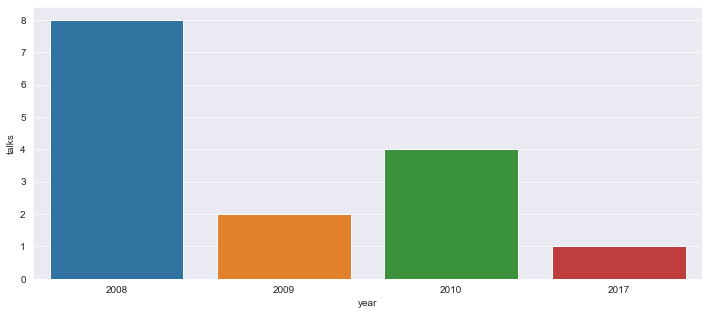

In [14]:
unpopular_data_no_tedex['year'] = unpopular_data_no_tedex['published_date'].apply(lambda x: x.year)
year_df = pd.DataFrame(unpopular_data_no_tedex['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

plt.figure(figsize=(12,5))
_ = sns.barplot(x='year', y='talks', data=year_df)

From the plot we can see that the majority of the unpopular talks were published in 2008 followed by 2010. So the low amount of views on these talks should not be due to them been released too recent or too early in the history of TED talks.

Looking at the time frame at which these unpopular videos were published we can see that the majority are between 2008 and 2010, which are the years in which the world financial crysis was at its spike.

### 3. Analysis by Day of the week
We will analyze which day of the week is most popular and has the maximum number of talks from our dataset.
We have used day_name function to return day of the week by passing date.

In [15]:
vidoesPerDayOfWeek = {}

def videosPerDayOfWeekCounter(x) :
    val = vidoesPerDayOfWeek.get(x[:3], 0)
    val += 1
    vidoesPerDayOfWeek[x[:3]] = val

df['film_date'].dt.day_name().apply(
    videosPerDayOfWeekCounter
)

print(vidoesPerDayOfWeek)


{'Sat': 336, 'Fri': 386, 'Sun': 110, 'Wed': 534, 'Thu': 551, 'Mon': 306, 'Tue': 327}


After taking the count of talks in each particular day of the week, we are visualizing the same though barplot.

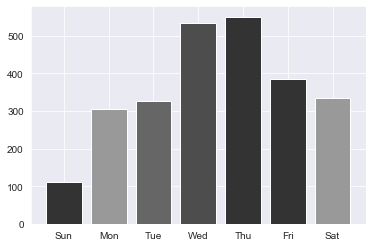

In [16]:
valList = [0,0,0,0,0,0,0]
keyList = ['Sun','Mon','Tue','Wed','Thu', 'Fri', 'Sat']
for k in vidoesPerDayOfWeek.keys():
    valList[keyList.index(k)] = vidoesPerDayOfWeek[k]

    
plt.bar(range(len(vidoesPerDayOfWeek)), valList, align='center',color=['0.2','0.6','0.4','0.3','0.2'])
plt.xticks(range(len(vidoesPerDayOfWeek)), keyList)
plt.show()

The distribution of days is almost a bell curve with **Wednesday and Thursday being the most popular days** and **Sunday being the least popular**. 
This is pretty interesting because someone might think that most TED Conferences would happen sometime in the weekend.

# TOP SPEAKERS
After exploring talks distributed throught the year now let us analyse by the speakers who have given most number of TED talks. Here we will gain insight on popular speakers.

In [17]:
topspeakers_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
topspeakers_df.columns = ['main_speaker', 'appearances']
topspeakers_df = topspeakers_df.sort_values('appearances', ascending=False)
topspeakers_df.head(5)

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5


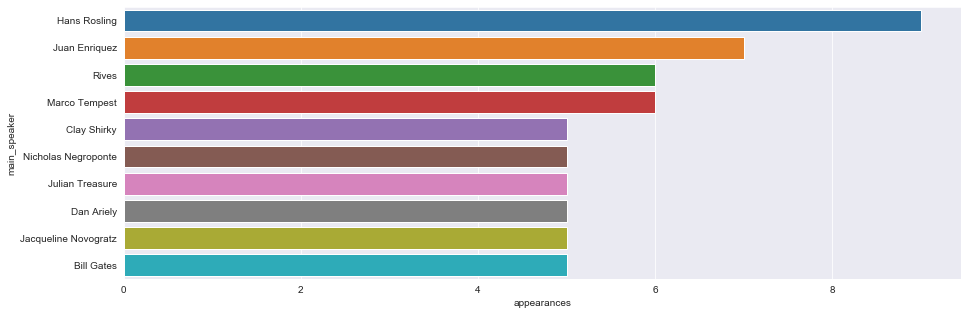

In [18]:
#plotting top speakers on a barplot
plt.figure(figsize=(15,5))
sb.barplot(y='main_speaker', x='appearances', data=topspeakers_df.head(10))
plt.show()

Here we can observe that **Hans Rosling** appears 9 times in TED talks as a main speaker, **Juan Enriquez** as 7 times, **Rives** as 6 times and so on...

Also since **Hans Rosling** is Global health expert and data visionary, this arises a question regarding speakers occupation. Which occupation should you choose if you want to become a TED Speaker? Let us have a look what kind of people TED is most interested in inviting to its events.
 

In [19]:
occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)
occupation_df.head(10)

,occupation,appearances
1426,Writer,45
83,Artist,34
413,Designer,34
753,Journalist,33
515,Entrepreneur,31
71,Architect,30
733,Inventor,27
1131,Psychologist,26
1011,Photographer,25
567,Filmmaker,21


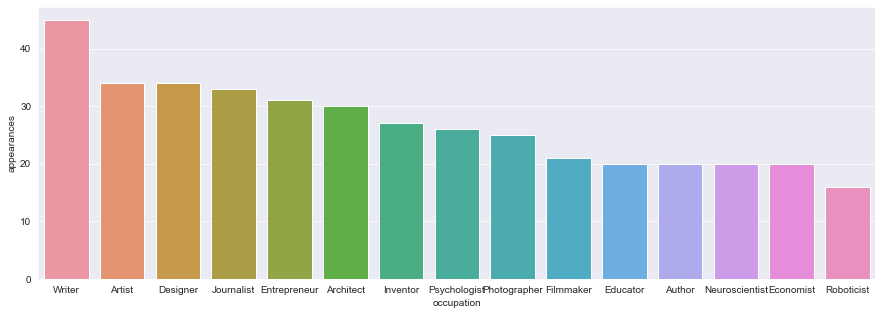

In [20]:
#plotting speaker occupation on a barplot
plt.figure(figsize=(15,5))
sb.barplot(x='occupation', y='appearances', data=occupation_df.head(15))
plt.show()

Here, **Writers** are the most popular with more than 45 speakers identifying themselves as the aforementioned.
**Artists** and **Designers** come a distant second with around 35 speakers in each category.

# Top Events
Now, we will try to answer questions on most worthy events of TED talks..

In [21]:
topevents_df = df[['title', 'event']].groupby('event').count().reset_index()
topevents_df.columns = ['event', 'talks']
topevents_df = topevents_df.sort_values('talks', ascending=False)
topevents_df.head(10)

,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


This chart visualizes that event **TED2014** had the most number to talks till date with more than **80** TED talks. Second topmost event is TED2009 with almost similar number of TED talks as TED2014.

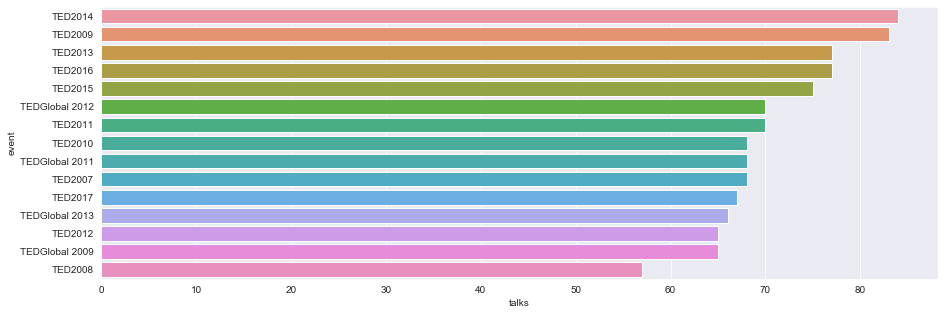

In [22]:
#plotting top events on a barplot
plt.figure(figsize=(15,5))
sb.barplot(y='event', x='talks', data=topevents_df.head(15))
plt.show()

## TED Languages
One remarkable aspect of TED Talks is the sheer number of languages in which it is accessible. Let us perform some very basic data visualisation and descriptive statistics about languages at TED.

In [23]:
df['languages'].describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

On average, a TED Talk is available in 27 different languages. **The maximum number of languages a TED Talk is available in is a staggering 72.** Let us check which talk this is.

In [24]:
df[df['languages'] == 72]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
973,736,"Is there something you've always meant to do, ...",207,TED2011,2011-03-03,72,Matt Cutts,Matt Cutts: Try something new for 30 days,1,2011-07-01 15:14:00,"[{'id': 10, 'name': 'Inspiring', 'count': 6171...","[{'id': 947, 'hero': 'https://pe.tedcdn.com/im...",Technologist,"['culture', 'success']",Try something new for 30 days,https://www.ted.com/talks/matt_cutts_try_somet...,8838874


The most translated TED Talk of all time is **'Matt Cutts: Try Something New in 30 Days'**. The talk does have a very universal theme of exploration. The sheer number of languages it's available in demands a little more inspection though as it has just over 8 million views, far fewer than the most popular TED Talks.


## TED Themes
In this section, we will try to find out the most popular themes in the TED conferences. Although TED started out as a conference about technology, entertainment and design, it has since diversified into virtually every field of study and walk of life. It will be interesting to see if this conference with Silicon Valley origins has a bias towards certain topics.

To answer this question, we need to wrangle our data in a way that it is suitable for analysis. More specifically, we need to split the related_tags list into separate rows.

In [25]:
import ast
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))

In [26]:
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [27]:
theme_df = df.drop('tags', axis=1).join(s)
theme_df.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,theme
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,children
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,creativity
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,culture
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,dance
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,education


In [28]:
len(theme_df['theme'].value_counts())

416

TED defines a staggering **416 different categories** for its talks. Let us now check the most popular themes.

In [29]:
popular_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
popular_themes.columns = ['theme', 'talks']
popular_themes.head(10)

,theme,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


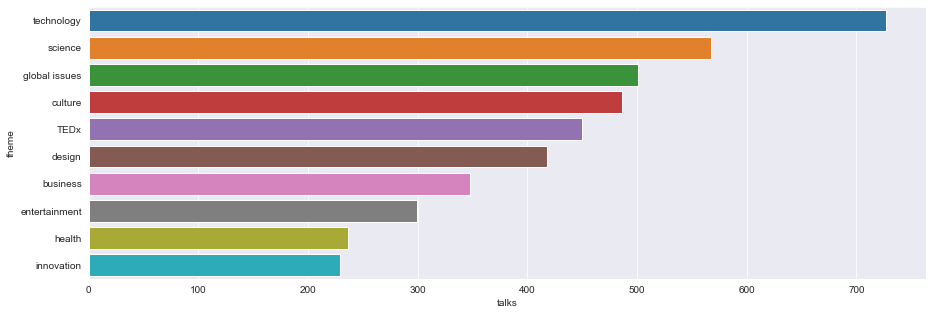

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(x='talks', y='theme', data=popular_themes.head(10))
plt.show()

As may have been expected, **Technology is the most popular topic for talks**. The other two original factions, Design and Entertainment, also make it to the list of top 10 themes. Science and Global Issues are the second and the third most popular themes respectively.

The next question I want to answer is the trends in the share of topics of TED Talks across the world. Has the demand for Technology talks increased? Do certain years have a disproportionate share of talks related to global issues? Let's find out!

We will only be considering the top 7 themes, excluding TEDx and talks after 2009, the year when the number of TED Talks really peaked.

In [31]:
from datetime import datetime

pop_theme_talks = theme_df[(theme_df['theme'].isin(popular_themes.head(8)['theme'])) & (theme_df['theme'] != 'TEDx')]
pop_theme_talks['date']  = pd.to_datetime(pop_theme_talks['film_date'], unit='s')
pop_theme_talks['y'] = pop_theme_talks['date'].dt.year
pop_theme_talks.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,theme,date,y
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,culture,2006-02-25,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,culture,2006-02-25,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,global issues,2006-02-25,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,science,2006-02-25,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,technology,2006-02-25,2006


In [32]:
pop_theme_talks['y'] = pop_theme_talks['y'].astype('int')
pop_theme_talks = pop_theme_talks[pop_theme_talks['y'] > 2006]
#print(pop_theme_talks)
pop_theme_talks.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,title,url,views,theme,date,y
63,97,"Accepting the 2007 TED Prize, Bill Clinton ask...",1447,TED2007,2007-03-08,26,Bill Clinton,Bill Clinton: My wish: Rebuilding Rwanda,1,2007-04-03 00:11:00,"[{'id': 9, 'name': 'Ingenious', 'count': 37}, ...","[{'id': 59, 'hero': 'https://pe.tedcdn.com/ima...",Activist,My wish: Rebuilding Rwanda,https://www.ted.com/talks/bill_clinton_on_rebu...,849859,business,2007-03-08,2007
63,97,"Accepting the 2007 TED Prize, Bill Clinton ask...",1447,TED2007,2007-03-08,26,Bill Clinton,Bill Clinton: My wish: Rebuilding Rwanda,1,2007-04-03 00:11:00,"[{'id': 9, 'name': 'Ingenious', 'count': 37}, ...","[{'id': 59, 'hero': 'https://pe.tedcdn.com/ima...",Activist,My wish: Rebuilding Rwanda,https://www.ted.com/talks/bill_clinton_on_rebu...,849859,culture,2007-03-08,2007
63,97,"Accepting the 2007 TED Prize, Bill Clinton ask...",1447,TED2007,2007-03-08,26,Bill Clinton,Bill Clinton: My wish: Rebuilding Rwanda,1,2007-04-03 00:11:00,"[{'id': 9, 'name': 'Ingenious', 'count': 37}, ...","[{'id': 59, 'hero': 'https://pe.tedcdn.com/ima...",Activist,My wish: Rebuilding Rwanda,https://www.ted.com/talks/bill_clinton_on_rebu...,849859,global issues,2007-03-08,2007
63,97,"Accepting the 2007 TED Prize, Bill Clinton ask...",1447,TED2007,2007-03-08,26,Bill Clinton,Bill Clinton: My wish: Rebuilding Rwanda,1,2007-04-03 00:11:00,"[{'id': 9, 'name': 'Ingenious', 'count': 37}, ...","[{'id': 59, 'hero': 'https://pe.tedcdn.com/ima...",Activist,My wish: Rebuilding Rwanda,https://www.ted.com/talks/bill_clinton_on_rebu...,849859,technology,2007-03-08,2007
64,89,"As E.O. Wilson accepts his 2007 TED Prize, he ...",1355,TED2007,2007-03-08,26,E.O. Wilson,E.O. Wilson: My wish: Build the Encyclopedia o...,1,2007-04-03 00:11:00,"[{'id': 9, 'name': 'Ingenious', 'count': 60}, ...","[{'id': 340, 'hero': 'https://pe.tedcdn.com/im...",Biologist,My wish: Build the Encyclopedia of Life,https://www.ted.com/talks/e_o_wilson_on_saving...,1335732,global issues,2007-03-08,2007


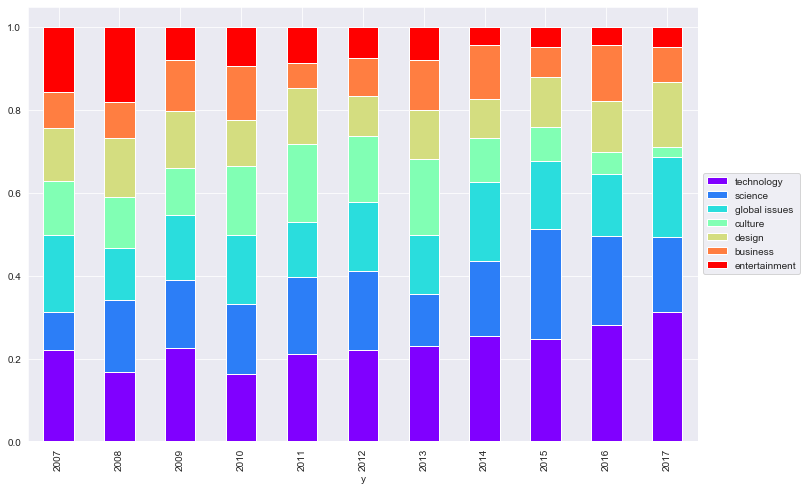

In [33]:
themes = list(popular_themes.head(8)['theme'])
themes.remove('TEDx')
ctab = pd.crosstab([pop_theme_talks['y']], pop_theme_talks['theme']).apply(lambda x: x/x.sum(), axis=1)
ctab[themes].plot(kind='bar', stacked=True, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

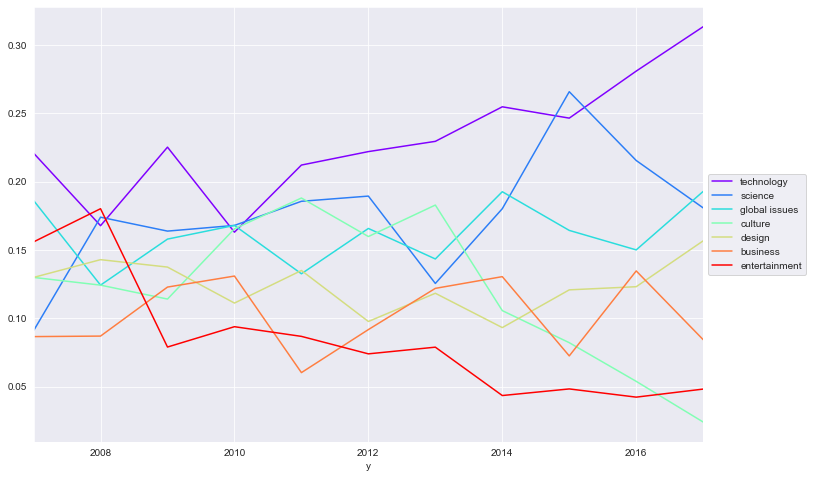

In [34]:
ctab[themes].plot(kind='line', stacked=False, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The proportion of technology talks has steadily increased over the years with a slight dip in 2010. This is understandable considering the boom of technologies such as blockchain, deep learning and augmented reality capturing people's imagination.

Talks on culture have witnessed a dip, decreasing steadily starting 2013. The share of culture talks has been the least in 2017. Entertainment talks also seem to have witnessed a slight decline in popularity since 2009.

Like with the speaker occupations, let us investigate if certain topics tend to garner more views than certain other topics. We will be doing this analysis for the top ten categories that we discovered in an earlier cell. As with the speaker occupations, the box plot will be used to deduce this relation.

(0, 4000000.0)

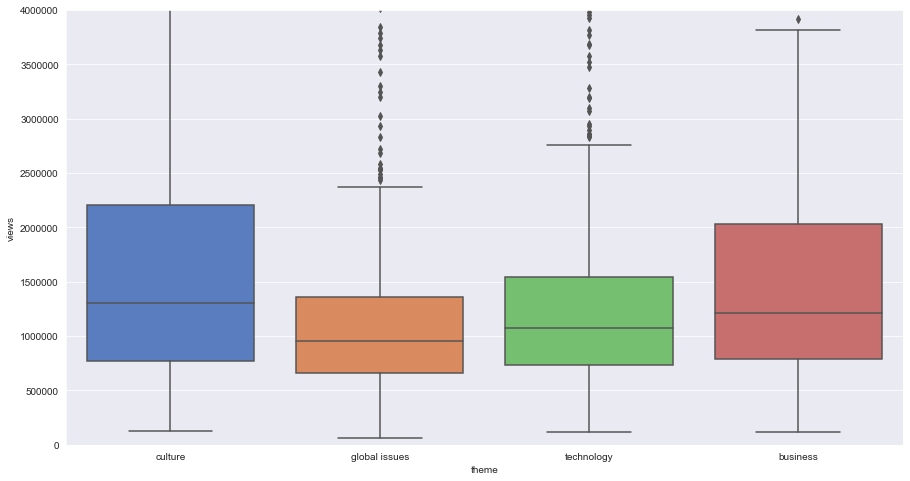

In [35]:
pop_theme_talks = theme_df[theme_df['theme'].isin(pop_theme_talks.head()['theme'])]
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='theme', y='views', data=pop_theme_talks, palette="muted", ax =ax)
ax.set_ylim([0, 0.4e7])

Although culture has lost its share in the number of TED Talks over the years, they garner the highest median number of views.